In [2]:
%%time
%matplotlib inline

import pandas as pd
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

CPU times: user 560 ms, sys: 104 ms, total: 664 ms
Wall time: 669 ms


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%%time
df = pd.read_csv('/Users/christopherpan 1/Desktop/All_Data/Train_Test_Set2/train_2_600_rnd2.csv',sep="|")

<string>:2: DtypeWarning: Columns (1,161653) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 4min 14s, sys: 19.6 s, total: 4min 34s
Wall time: 4min 44s


In [4]:
%%time
df.shape

CPU times: user 24 µs, sys: 1 µs, total: 25 µs
Wall time: 29.8 µs


(600, 161658)

In [5]:
df = df.drop(df.columns[0], axis = 1) 
df.drop(df.columns[0], axis = 1) 

,C0000039,C0000052,C0000084,C0000096,C0000097,C0000098,C0000102,C0000119,C0000163,C0000165,...,C3266800,C3266812,C3266814,C3266816,C3266817,file_name_intagged,CUI,Old_Tag,Max_Tag,Avg_Tag
0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,867575-overview,C0038454,1.000000,1.000000,0.395047
1,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1162340-overview,C0038454,1.000000,1.000000,0.535366
2,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1162437-overview,C0038454,1.000000,1.000000,0.666738
3,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,6,000328.htm,C0038454,1.000000,1.000000,1.000000
4,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1161422-overview,C0038454,1.000000,1.000000,1.000000
5,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1163331-overview,C0038454,1.000000,1.000000,0.446882
6,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1159900-overview,C0038454,1.000000,1.000000,0.549614
7,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1160261-overview,C0038454,1.000000,1.000000,0.661912
8,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,323409-overview,C0038454,1.000000,1.000000,1.000000
9,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1160021-overview,C0038454,1.000000,1.000000,1.000000


In [6]:
type(df.columns[9])

str

In [7]:
print(len(df.columns))

161657


In [8]:
%%time
df['Max_Tag'].describe()

CPU times: user 4.35 ms, sys: 1.09 ms, total: 5.44 ms
Wall time: 7.08 ms


count    600.000000
mean       0.241159
std        0.152407
min       -0.024018
25%        0.145274
50%        0.217084
75%        0.315624
max        1.000000
Name: Max_Tag, dtype: float64

CPU times: user 202 ms, sys: 16.9 ms, total: 219 ms
Wall time: 239 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ad66748>]],
      dtype=object)

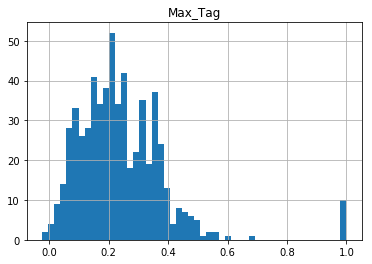

In [9]:
%%time
df.hist(column='Max_Tag', bins=50)

In [10]:
%%time
df.isnull().values.any()

CPU times: user 308 ms, sys: 158 ms, total: 466 ms
Wall time: 464 ms


False

In [11]:
%%time
print('y <= 0.00       : ',len(df[(df['Max_Tag']<=0)]), 100*len(df[(df['Max_Tag']<=0)])/17248.0)
print('0.00 < y <= 0.05: ',len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)]), 100*len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)])//600.0)
print('0.05 < y <= 0.10: ',len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)]), 100*len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)])/600.0)
print('0.10 < y <= 0.20: ',len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)]), 100*len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)])/600.0)
print('0.20 < y <= 0.30: ',len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)]), 100*len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)])/600.0)
print('0.30 < y <= 0.40: ',len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)]), 100*len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)])/600.0)
print('0.40 < y <= 0.50: ',len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)]), 100*len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)])/600.0)
print('0.50 < y <= 0.60: ',len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)]), 100*len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)])/600.0)
print('0.60 < y <= 0.70: ',len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)]), 100*len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)])/600.0)
print('0.70 < y <= 0.80: ',len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)]), 100*len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)])/600.0)
print('0.80 < y <= 0.90: ',len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)]), 100*len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)])/600.0)
print('0.90 < y <= 1.00: ',len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)]), 100*len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)])/600.0)
print('1.00 < y <= 1.10: ',len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)]), 100*len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)])/600.0)

y <= 0.00       :  2 0.011595547309833023
0.00 < y <= 0.05:  20 3.0
0.05 < y <= 0.10:  69 11.5
0.10 < y <= 0.20:  156 26.0
0.20 < y <= 0.30:  171 28.5
0.30 < y <= 0.40:  131 21.833333333333332
0.40 < y <= 0.50:  31 5.166666666666667
0.50 < y <= 0.60:  9 1.5
0.60 < y <= 0.70:  1 0.16666666666666666
0.70 < y <= 0.80:  0 0.0
0.80 < y <= 0.90:  0 0.0
0.90 < y <= 1.00:  10 1.6666666666666667
1.00 < y <= 1.10:  0 0.0
CPU times: user 1.02 s, sys: 648 ms, total: 1.67 s
Wall time: 1.76 s


In [12]:
df['Bin_tag'] = (df['Max_Tag'] > 0.3)
df['Bin_tag'].astype(object).replace({False:'0',True:'1'})

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
570    0
571    0
572    0
573    1
574    0
575    1
576    0
577    0
578    0
579    0
580    0
581    1
582    0
583    0
584    0
585    0
586    0
587    0
588    0
589    0
590    1
591    0
592    0
593    0
594    0
595    0
596    0
597    1
598    0
599    0
Name: Bin_tag, Length: 600, dtype: object

In [13]:
clean_frame_train = df.drop(['file_name_intagged', 'CUI', 'Max_Tag','Avg_Tag','Old_Tag'], axis=1, inplace=False)

In [14]:
from sklearn.model_selection import train_test_split

y = clean_frame_train.Bin_tag
#X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train_2, y, stratify = true, test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train, y, test_size=0.20)

X_tr = X_train.drop(['Bin_tag'], axis=1)
X_vl = X_valid.drop(['Bin_tag'], axis=1)

X_tr = X_tr.drop(X_tr.columns[0], axis = 1).as_matrix()
X_vl = X_vl.drop(X_vl.columns[0], axis = 1).as_matrix()

y_tr = y_train.astype(object).replace({False:'0',True:'1'}).as_matrix()
y_vl = y_valid.astype(object).replace({False:'0',True:'1'}).as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [15]:
print(len(X_vl))

120


In [20]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()

#C_param_range = [0.001,0.01,0.1,1,10,100,1000]
#for c in C_param_range:
regr.set_params(penalty ='l1',C = .1)
regr.fit(X_tr,y_tr)
a = regr.predict(X_vl)
print(a)
b = regr.predict_proba(X_vl)
print(b)
score = regr.score(X_vl, y_vl)
print(score)

['0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
[[5.67626386e-01 4.32373614e-01]
 [3.31584707e-02 9.66841529e-01]
 [7.74962196e-01 2.25037804e-01]
 [9.02621171e-01 9.73788285e-02]
 [7.08338208e-01 2.91661792e-01]
 [7.87373464e-01 2.12626536e-01]
 [8.23814760e-01 1.76185240e-01]
 [4.99060470e-01 5.00939530e-01]
 [8.59272279e-01 1.40727721e-01]
 [3.75574232e-02 9.62442577e-01]
 [7.61977660e-01 2.38022340e-01]
 [7.66347846e-01 2.33652154e-01]
 [2.25575662e-01 7.74424338e-01]
 [7.88853818e-01 2.11146182e-01]
 [2.92639335e-01 7.07360665e-01]
 [7.71194343e-01 

In [17]:
type(a[1])

str

In [18]:
results = [0,0,0,0]
#Format = (y_vl,y_pred in a): in results 0 is (0,0), 1 is (1,0), 2 is (0,1), 3 is (1,1) 
for i in range(120):
    if y_vl[i] == '0' and a[i] == '0':
        results[0] += 1
    elif y_vl[i] == '1' and a[i] == '0':
        results[1] += 1
    elif y_vl[i] == '0' and a[i] == '1':
        results[2] += 1
    elif y_vl[i] == '1' and a[i] == '1':
        results[3] += 1

In [19]:
#Format = (y_vl,y_pred in a): in results 0 is (0,0), 1 is (1,0), 2 is (0,1), 3 is (1,1) 
print('  0  1')
print('0 ' + str(results[0]) + ' ' + str(results[1]))
print('1 ' + str(results[2]) + ' ' + str(results[3]))

  0  1
0 74 26
1 10 10
